# Drugs Classification

Drugs classification based on patient conditions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import  classification_report , accuracy_score 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
print('columns: ', df.columns)
print()
print(df.dtypes)


columns:  Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [4]:
numerical = ['Age', 'Na_to_K']

#for categorical
categorical = list(df.dtypes[df.dtypes == 'object'].index)

print('numerical: ', numerical)
print('categorical: ', categorical)

#the target is drug column, so will removes it
categorical.remove('Drug')
print(categorical)

numerical:  ['Age', 'Na_to_K']
categorical:  ['Sex', 'BP', 'Cholesterol', 'Drug']
['Sex', 'BP', 'Cholesterol']


## EDA

In [5]:
#find missing values
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

There are no missing values in the dataset. 

In [6]:
#shape of the dataset
df.shape

(200, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
#find duplicate in the dataset
df.duplicated().sum()

0

Now, let's take a look at the numerical columns.

In [9]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Next, Categorical variable:

In [10]:
for cat in categorical:
    print('######## %s ########'%cat)
    print('Unique value: ', df[cat].unique())
    print('Total of unique value: ', df[cat].nunique())
    print()

######## Sex ########
Unique value:  ['F' 'M']
Total of unique value:  2

######## BP ########
Unique value:  ['HIGH' 'LOW' 'NORMAL']
Total of unique value:  3

######## Cholesterol ########
Unique value:  ['HIGH' 'NORMAL']
Total of unique value:  2



for the target (drugs)

In [11]:
print('Unique values of Drug: ', df.Drug.unique())
print('Total of unique values: ', df.Drug.nunique())

Unique values of Drug:  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
Total of unique values:  5


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Drug', ylabel='Count'>

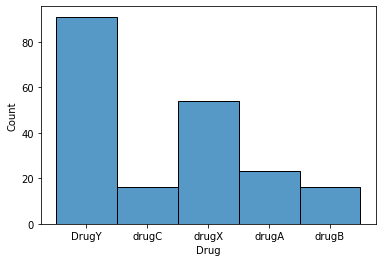

In [12]:
#distribution of the drugs
sns.histplot(df.Drug)

In [13]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

### Relationship between variables

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

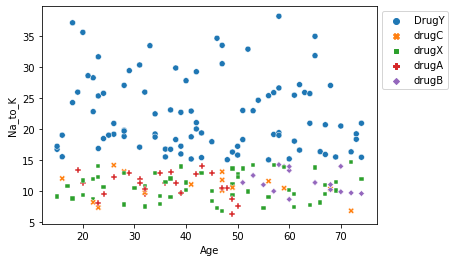

In [14]:
#for numerical columns with 'Drug'

sns.scatterplot(
    x='Age', 
    y='Na_to_K', 
    hue='Drug',
    style='Drug',
    data=df
)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

From the plot above, we can conclude that:

- DrugY is used among all ages with Na_to_K values starting from around 15.
- drugC and drugX are used by all ages with Na_to_K values around below 15
- drugA is used under the age until 50 with Na_to_K values around below 15
- drugB is used over the age of 50 with a Na_to_K value around below 15 

In [15]:
#for categorical columns with 'Drug' column.
categorical

['Sex', 'BP', 'Cholesterol']

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

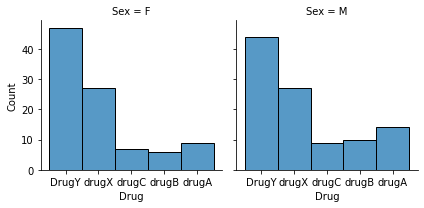

In [16]:
# 'sex' and 'drug'
sex = sns.FacetGrid(df, col="Sex",)
sex.map(sns.histplot, "Drug")

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

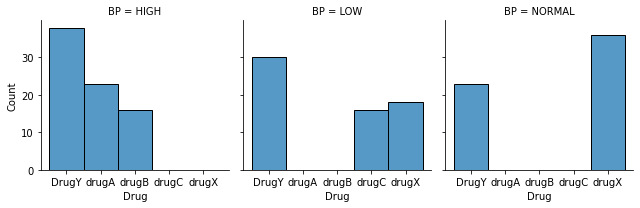

In [17]:
# 'BP' and 'drug'
bp = sns.FacetGrid(df, col="BP",)
bp.map(sns.histplot, "Drug")

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

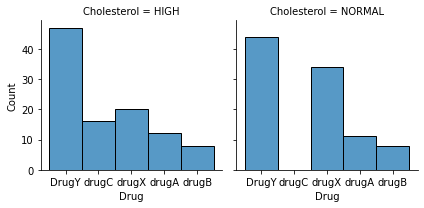

In [18]:
# 'Cholesterol' and 'drug'
chl = sns.FacetGrid(df, col="Cholesterol",)
chl.map(sns.histplot, "Drug")

## Split Dataset

In [19]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [20]:
df.shape

(200, 6)

In [21]:
new_df = df.drop('Drug', axis=1)
new_df

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_full_train.Drug.values)
y_test = (df_test.Drug.values)

del df_full_train['Drug']
del df_test['Drug']

In [23]:
print("Full dataset: ", df.shape)
print("Train: ", df_full_train.shape)
print("Test: ", df_test.shape)

Full dataset:  (200, 6)
Train:  (160, 5)
Test:  (40, 5)


## Model Training

In [24]:
#train 
train_dicts = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

#Test
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

## Logistic Regression

For model training, I will use K-Fold Cross-Validation with n_splits=5

In [25]:
def kfold_cross_val(model):
    n_splits = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=n_splits)
    print('Scores each folds: ', score)
    print('Accuracy: ', round(score.mean(), 3))

In [26]:
lr_model = LogisticRegression(max_iter=2000, C=1.0)
lr_score = kfold_cross_val(lr_model)
lr_score

Scores each folds:  [0.96875 1.      0.90625 0.96875 0.96875]
Accuracy:  0.962


In [27]:
#try for different C values

print("----- Logistic Regression -----")
for c in [0.1, 0.5, 1, 5]:
    log_model=LogisticRegression(max_iter=3000, C=c)
    print("C: ", c)
    kfold_cross_val(log_model)
    print("---------------")

----- Logistic Regression -----
C:  0.1
Scores each folds:  [0.8125  0.90625 0.8125  0.75    0.875  ]
Accuracy:  0.831
---------------
C:  0.5
Scores each folds:  [0.9375  1.      0.90625 0.9375  0.96875]
Accuracy:  0.95
---------------
C:  1
Scores each folds:  [0.96875 1.      0.90625 0.96875 0.96875]
Accuracy:  0.962
---------------
C:  5
Scores each folds:  [1.      0.96875 0.9375  0.96875 1.     ]
Accuracy:  0.975
---------------


## Decision Tree Model

In [31]:
dt = DecisionTreeClassifier(random_state=42)
dt_score = kfold_cross_val(dt)
dt_score

Scores each folds:  [1.     1.     0.9375 1.     1.    ]
Accuracy:  0.988


In [32]:
param_grid = {
    'max_depth': [5, 7, 9, 10, 15, 20, 50],
    'min_samples_leaf': [5, 10, 15, 20, 100, 200],
    }

dt = DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(estimator= dt, 
                  param_grid= param_grid, 
                  scoring= 'accuracy',
                  cv=5, 
                  verbose=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, 9, 10, 15, 20, 50],
                         'min_samples_leaf': [5, 10, 15, 20, 100, 200]},
             scoring='accuracy', verbose=True)

In [33]:
print('best dt model: ', gs.best_estimator_)
print('best dt accuracy score: ', gs.best_score_)


best dt model:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
best dt accuracy score:  0.99375


## Random Forest

In [34]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
kfold_cross_val(rf)

Scores each folds:  [1.     1.     0.9375 1.     1.    ]
Accuracy:  0.988


In [35]:
param_grid = {
    'max_depth': [5, 7, 9, 10, 15, 20, 25, 50],
    'n_estimators': [5, 10, 15, 20, 50, 100, 200]
    }


rf = RandomForestClassifier(random_state=42, n_jobs=-1)
gs = GridSearchCV(estimator= rf, 
                  param_grid= param_grid, 
                  scoring= 'accuracy',
                  cv=5, 
                  verbose=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [5, 7, 9, 10, 15, 20, 25, 50],
                         'n_estimators': [5, 10, 15, 20, 50, 100, 200]},
             scoring='accuracy', verbose=True)

In [36]:
print('best rf model: ', gs.best_params_)
print('best rf rmse score: ', gs.best_score_)

best rf model:  {'max_depth': 5, 'n_estimators': 10}
best rf rmse score:  0.99375


## Selected Model

For deployment I will use model from Random Forest one (please don't ask me why).

In [37]:
best_rf = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)
best_rf.score(X_train  , y_train )

1.0

In [38]:
best_rf.score(X_test  , y_test )

1.0

In [39]:
best_rf_predict = best_rf.predict(X_test)

In [51]:
accuracy_score(best_rf_predict, y_test)

1.0

In [41]:
print(classification_report(y_test, best_rf_predict))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Notes: All the models, have same scores more or less 99% accuracy. I don't really know the reasons but probably because how I split the data and how do I prepare it. Anyway if you know, please kindly tell me. Also lastly, thank you and have a nice day! 